Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import data

In [ ]:
dataset = pd.read_csv('house_prices2_missing_data.csv')

# remove rows with empty values
df_clean = dataset.dropna()
print(df_clean)

# replace missing numerical values w/ column average
# import math
# column_means = dataset.mean()
# replacements = {'bedrooms': math.floor(column_means[1])}
# df_filled = dataset.fillna(replacements)
# print(df_filled)

# replace missing yes/no values w/ no
# replacements = {'mainroad': "no"}
# df_filled = dataset.fillna(replacements)
# print(df_filled)

     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420       4.0        2.0        3      yes        no       no   
1    8960       4.0        4.0        4      yes        no       no   
2    9960       3.0        2.0        2      yes        no      yes   
5    7500       3.0        3.0        1      yes        no      yes   
6    8580       4.0        3.0        4      yes        no       no   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000       2.0        1.0        1      yes        no      yes   
541  2400       3.0        1.0        1       no        no       no   
542  3620       2.0        1.0        1      yes        no       no   
543  2910       3.0        1.0        1       no        no       no   
544  3850       3.0        1.0        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  \
0                no             yes        2      yes        furnished   

LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
col_list = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df_clean[col_list] = df_clean[col_list].apply(LabelEncoder().fit_transform)
print(dataset)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420       4.0        2.0        3         1          0         0   
1    8960       4.0        4.0        4         1          0         0   
2    9960       3.0        2.0        2         1          0         1   
3    7500       NaN        2.0        2         1          0         1   
4    7420       4.0        1.0        2         2          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000       2.0        1.0        1         1          0         1   
541  2400       3.0        1.0        1         0          0         0   
542  3620       2.0        1.0        1         1          0         0   
543  2910       3.0        1.0        1         0          0         0   
544  3850       3.0        1.0        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea furnishingstatus  \
0                  0              

<ipython-input-39-906bcc7fb5a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col_list] = df_clean[col_list].apply(LabelEncoder().fit_transform)


OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encode', OneHotEncoder(), [11])], remainder='passthrough')
transformed_data = ct.fit_transform(df_clean)
transformed_df = pd.DataFrame(transformed_data, columns = [
    'furnishstatus_A', 'furnishingstatus_B', 'furnishingstatus_C',
    'area', 'bedroom', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
    'hotwaterehating', 'airconditioning', 'parking', 'prefarea', 'price'
])
print(transformed_df)

     furnishstatus_A  furnishingstatus_B  furnishingstatus_C    area  bedroom  \
0                1.0                 0.0                 0.0  7420.0      4.0   
1                1.0                 0.0                 0.0  8960.0      4.0   
2                0.0                 1.0                 0.0  9960.0      3.0   
3                0.0                 1.0                 0.0  7500.0      3.0   
4                0.0                 1.0                 0.0  8580.0      4.0   
..               ...                 ...                 ...     ...      ...   
536              0.0                 0.0                 1.0  3000.0      2.0   
537              0.0                 1.0                 0.0  2400.0      3.0   
538              0.0                 0.0                 1.0  3620.0      2.0   
539              1.0                 0.0                 0.0  2910.0      3.0   
540              0.0                 0.0                 1.0  3850.0      3.0   

     bathrooms  stories  ma

Save data to drive file

In [ ]:
from google.colab import drive
drive.mount('drive')
transformed_df.to_csv('house_prices2_transformed.csv')
!cp house_prices2_transformed.csv "drive/My Drive/"

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


Split dataset into X and y arrays

In [ ]:
X = transformed_df.iloc[:, :-1].values
y = transformed_df.iloc[:, -1].values

Print inputs as numpy array

In [ ]:
np.set_printoptions(suppress=True)
with np.printoptions(threshold=np.inf):
  print(X.astype(int))

[[    1     0     0  7420     4     2     3     1     0     0     0     1
      2     1]
 [    1     0     0  8960     4     4     4     1     0     0     0     1
      3     0]
 [    0     1     0  9960     3     2     2     1     0     1     0     0
      2     1]
 [    0     1     0  7500     3     3     1     1     0     1     0     1
      2     1]
 [    0     1     0  8580     4     3     4     1     0     0     0     1
      2     1]
 [    1     0     0  8100     4     1     2     1     1     1     0     1
      2     1]
 [    0     0     1  5750     3     2     4     1     1     0     0     1
      1     1]
 [    0     1     0  6000     4     3     2     1     1     1     1     0
      2     0]
 [    0     1     0  6550     4     2     2     1     0     0     0     1
      1     1]
 [    1     0     0  3500     4     2     2     1     0     0     1     0
      2     0]
 [    0     1     0  7800     3     2     2     1     0     0     0     0
      0     1]
 [    0     1     0  

Split the dataset into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 2. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


Train the model


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Make predictions

In [ ]:
predictions = regressor.predict(X_test)
numtests = len(y_test)
combinedData = np.concatenate((X_test, y_test.reshape(numtests, 1), predictions.reshape(numtests, 1)), 1)
print(combinedData)

[[      0.               1.               0.         ...       0.
  6650000.         5551561.20095675]
 [      0.               1.               0.         ...       0.
  3500000.         3306835.95643211]
 [      1.               0.               0.         ...       0.
  3570000.         3851717.38633254]
 ...
 [      0.               1.               0.         ...       0.
  1767150.         2366623.83873788]
 [      0.               0.               1.         ...       0.
  2660000.         2477963.39659943]
 [      0.               1.               0.         ...       1.
  9240000.         6086073.54015306]]


Plot predictions vs actual values

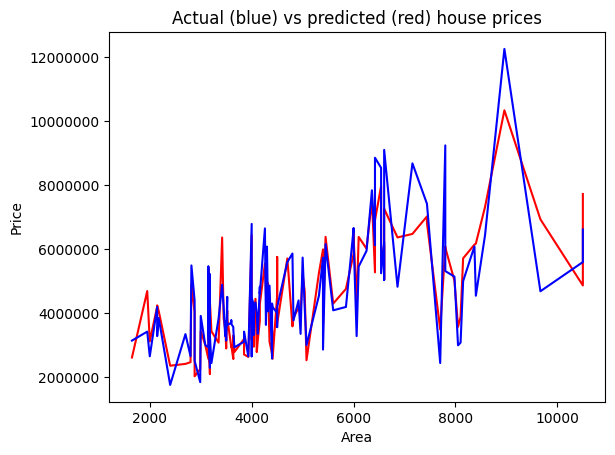

In [ ]:
plt.ticklabel_format(style='plain')
num_columns = combinedData.shape[1]
combinedData = combinedData[combinedData[:, 3].argsort()]
plt.title('Actual (blue) vs predicted (red) house prices')
plt.xlabel('Area')
plt.ylabel('Price')
plt.plot(combinedData[:,3], combinedData[:,-1], color="red")
plt.plot(combinedData[:,3], combinedData[:,-2], color="blue")
plt.show()